In [322]:
import pandas as pd
import xlwings as xw
import seaborn as sns
import matplotlib.pyplot as plt
PATH = 'C:/Users\waqar/Desktop/fiver 7 oct/Feedback Tracker Eingabe.xlsm'
wb = xw.Book(PATH)
sheet = wb.sheets['Outbound']

In [323]:
df = sheet['A:H'].options(pd.DataFrame, index=False, header=True).value.dropna(how='all', axis=0)
df['Anzahl Feedbacks']=df['Anzahl Feedbacks'].fillna(1)
vals_to_replace = {0.0:1, 2.0:1, 3.0:1,4.0:1,5.0:1,6.0:1,7.0:1,8.0:1,9.0:1,10.0:1,11.0:1,12.0:1,13.0:1,14.0:1,15.0:1,16.0:1}
df['Anzahl Feedbacks'] =df['Anzahl Feedbacks'].replace(vals_to_replace).astype(int)
#df["2-Mann PUP"]=df["2-Mann PUP"].fillna(0)
df.replace({"Pack": "Pack", "ShipDock": "Ship","Pcik":"Pick","Pi´ck":"Pick","Ship ": "Ship","Pack/ Rebin":"Pack","Pack/ Pick":"Pack",
            "PIck":"Pick","Pick ":"Pick","pick":"Pick","pick ":"Pick"," Pick":"Pick"," Pack":"Pack","pack":"Pack","Pack ":"Pack"
           ,"ship":"Ship"}
                               , inplace=True)
df.head()

,Feedback Datum,Login,Anzahl Feedbacks,2-Mann PUP,Bemerkung,Feedback erteilt durch,Abteilung,Woche
0,2018-08-08,maskiera,1,None,Artikel zu viel eingepackt (Extra),Niyazi Eren,Pack,32.0
1,2018-08-08,leaschw,1,None,Artikel zu viel eingepackt (Extra),Niyazi Eren,Pack,32.0
2,2018-08-08,Scheugen,1,None,Pickregelverletzung,Lokman Bayrak,Pick,32.0
3,2018-08-08,Jweidema,1,None,Pickregelverletzung,Lokman Bayrak,Pick,32.0
4,2018-08-24,aihumat,1,None,zu viel gepickt (mit VE:Units in Verp.Einheit),Yasir Uygur,Pick,34.0


In [324]:
df['Feedback Datum']=df['Feedback Datum'].apply(pd.to_datetime)
df.info()
df['Week_Number'] = df['Feedback Datum'].dt.week
#df['Week_Number'].astype(int)
df.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7948 entries, 0 to 7947
Data columns (total 8 columns):
Feedback Datum            7947 non-null datetime64[ns]
Login                     7947 non-null object
Anzahl Feedbacks          7948 non-null int32
2-Mann PUP                54 non-null object
Bemerkung                 7940 non-null object
Feedback erteilt durch    7942 non-null object
Abteilung                 7832 non-null object
Woche                     7797 non-null float64
dtypes: datetime64[ns](1), float64(1), int32(1), object(5)
memory usage: 527.8+ KB


,Feedback Datum,Login,Anzahl Feedbacks,2-Mann PUP,Bemerkung,Feedback erteilt durch,Abteilung,Woche,Week_Number
7943,2020-10-02,mdasifuz,1,None,zu viel fillpack verwendet,Betuel Karadere,Pack,NaN,40.0
7944,2020-10-02,ymuhamus,1,None,Hazmat Sticker fehlt,Betuel Karadere,Pack,NaN,40.0
7945,2020-10-02,nucar,1,None,Single Item Flow an Sortable Linie wurde einge...,Betuel Karadere,Pack,NaN,40.0
7946,2020-10-02,baldigab,1,None,Artikel zu viel eingepackt ( Extra),Betuel Karadere,Pack,NaN,40.0
7947,2020-10-02,cbartlog,1,None,Spoo Label vergessen,Betuel Karadere,Pack,NaN,40.0


In [325]:
df=df.set_index('Feedback Datum')
df.dropna(how='all', axis=0)
df.head()

,Login,Anzahl Feedbacks,2-Mann PUP,Bemerkung,Feedback erteilt durch,Abteilung,Woche,Week_Number
Feedback Datum,,,,,,,,
2018-08-08,maskiera,1,None,Artikel zu viel eingepackt (Extra),Niyazi Eren,Pack,32.0,32.0
2018-08-08,leaschw,1,None,Artikel zu viel eingepackt (Extra),Niyazi Eren,Pack,32.0,32.0
2018-08-08,Scheugen,1,None,Pickregelverletzung,Lokman Bayrak,Pick,32.0,32.0
2018-08-08,Jweidema,1,None,Pickregelverletzung,Lokman Bayrak,Pick,32.0,32.0
2018-08-24,aihumat,1,None,zu viel gepickt (mit VE:Units in Verp.Einheit),Yasir Uygur,Pick,34.0,34.0


In [327]:
df1=df.loc['2020', ['Anzahl Feedbacks','Week_Number',"Abteilung"]].groupby(["Week_Number","Abteilung"]).sum().reset_index()
df_pivo=pd.pivot_table(df1,index=["Week_Number"],columns='Abteilung',values='Anzahl Feedbacks')
df_pivo=df_pivo.drop(["Receive","Stow","VRET"],axis=1).fillna(0)
df_pivo['Total']=df_pivo['Pack']+df_pivo['Pick']+df_pivo['Ship']
df_pivo.head()

Abteilung,Pack,Pick,Ship,Total
Week_Number,,,,
1.0,46.0,9.0,10.0,65.0
2.0,56.0,48.0,0.0,104.0
3.0,32.0,63.0,3.0,98.0
4.0,32.0,53.0,0.0,85.0
5.0,57.0,55.0,0.0,112.0


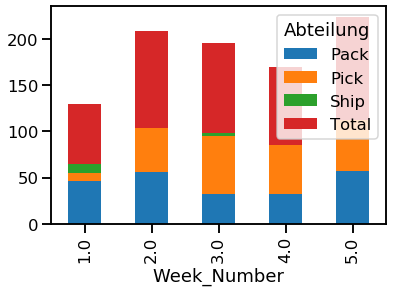

In [332]:
df_pivo.head().plot(kind="bar", stacked=True)
plt.show()

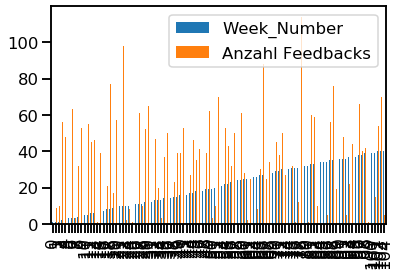

In [329]:
df1.plot.bar();

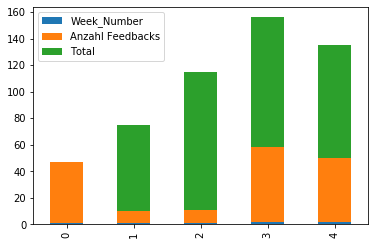

In [292]:
df1.head().plot(kind="bar", stacked=True)
plt.show()

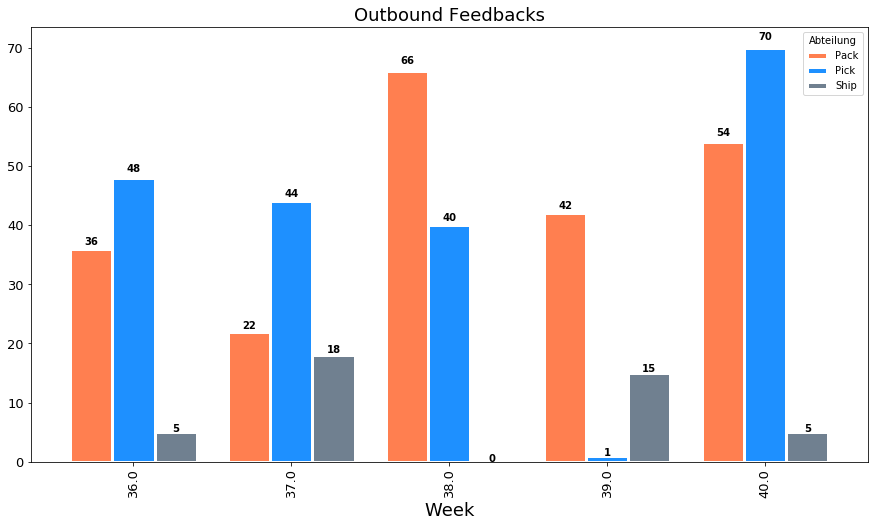

In [293]:
ax = df_pivo.tail(5).plot(kind='bar', figsize=(15,8),
        color=["coral",'dodgerblue', 'slategray','orange','red'], fontsize=13,width=0.8,edgecolor='white', linewidth=3);
#ax.set_alpha(0.8)
ax.set_title("Outbound Feedbacks", fontsize=18)
ax.set_xlabel("Week", fontsize=18)
#total = len(df_pivo['Pack'])
for patch in ax.patches:
    bl = patch.get_xy()
    x = 0.5 * patch.get_width() + bl[0]
    #percentage = '{:.1f}%'.format(100 * patch.get_width()/total)
    # change 0.92 to move the text up and down
    y = 1.02 * patch.get_height() + bl[1]
    ax.text(x,y,"%d" %(patch.get_height()),
            ha='center', rotation='horizontal', weight = 'bold')

In [256]:
df_pivo.head()

Abteilung,Pack,Pick,shiplimit,Picklimit,week,Ship,Packlimit,Total
Week_Number,,,,,,,,
1.0,46.0,9.0,5,50,first,10.0,35,65.0
2.0,56.0,48.0,5,50,first,0.0,35,104.0
3.0,32.0,63.0,5,50,first,3.0,35,98.0
4.0,32.0,53.0,5,50,first,0.0,35,85.0
5.0,57.0,55.0,5,50,first,0.0,35,112.0


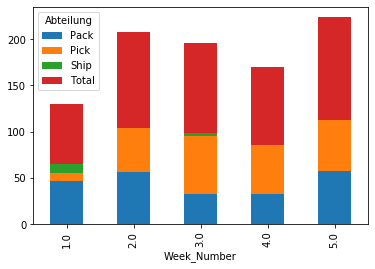

In [267]:
df_pivo.head().plot(kind="bar", stacked=True)
plt.show()


In [258]:
x= df_pivo[['Pack','Pick','Ship']]
plt.show()

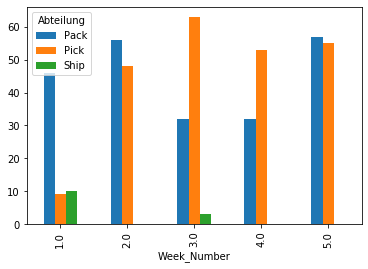

In [259]:
x.head().plot(kind="bar", stacked=False)
plt.show()

In [260]:
y=df_pivo[['Packlimit','Picklimit','shiplimit','week']]


In [250]:
y

Abteilung,Packlimit,Picklimit,shiplimit,week
Week_Number,,,,
1.0,35,50,5,first
2.0,35,50,5,first
3.0,35,50,5,first
4.0,35,50,5,first
5.0,35,50,5,first
6.0,35,50,5,first
7.0,35,50,5,first
8.0,35,50,5,first
9.0,35,50,5,first


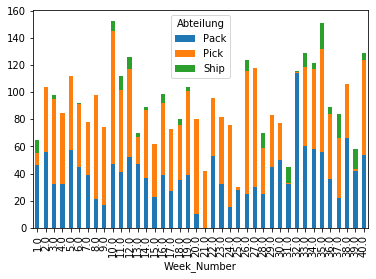

In [261]:
axis =x.plot(kind="bar", stacked=True)
plt.show()

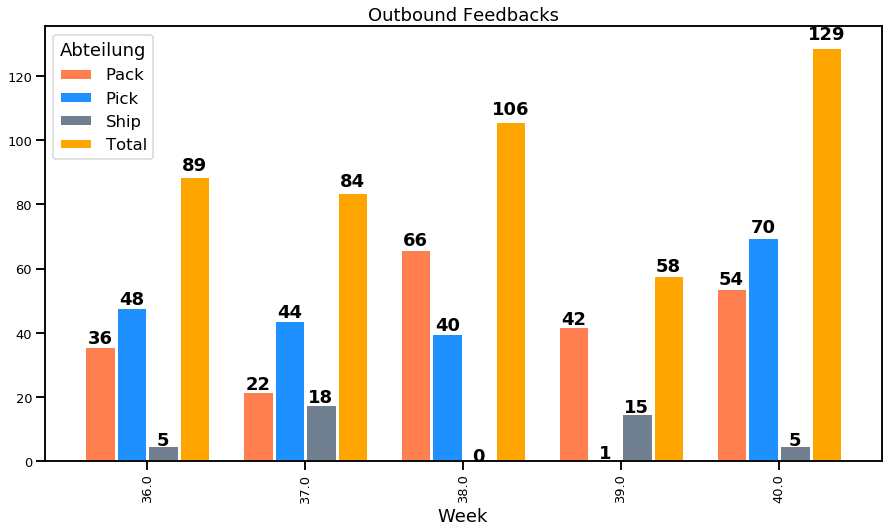

In [333]:
ax = df_pivo.tail(5).plot(kind='bar', figsize=(15,8),
        color=["coral",'dodgerblue', 'slategray','orange'], fontsize=13,width=0.8,edgecolor='white', linewidth=3);
#ax.set_alpha(0.8)
ax.set_title("Outbound Feedbacks", fontsize=18)
ax.set_xlabel("Week", fontsize=18)
#total = len(df_pivo['Pack'])
for patch in ax.patches:
    bl = patch.get_xy()
    x = 0.5 * patch.get_width() + bl[0]
    #percentage = '{:.1f}%'.format(100 * patch.get_width()/total)
    # change 0.92 to move the text up and down
    y = 1.02 * patch.get_height() + bl[1]
    ax.text(x,y,"%d" %(patch.get_height()),
            ha='center', rotation='horizontal', weight = 'bold')


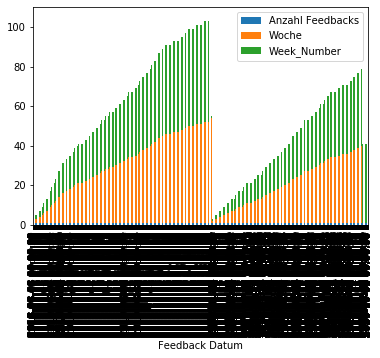

In [314]:
ax = df.plot.bar(stacked=True)